In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure

output_notebook()
%matplotlib inline

Loading BokehJS ...

# Import datasets

In [59]:
files = os.listdir('Processed_data/')
datasets = []
for file in files:
    path = 'Processed_data/' + file
    datasets.append(pd.read_csv(path))

In [77]:
# Create labels:
names = []
for i in range(len(os.listdir('Processed_data/'))):
    names.append(f"Windpark {i+1}")

names

['Windpark 1',
 'Windpark 2',
 'Windpark 3',
 'Windpark 4',
 'Windpark 5',
 'Windpark 6',
 'Windpark 7']

In [190]:
def create_wd_buckets(df, n_buckets):
    wd_buckets = np.linspace(0,360, n_buckets)
    bucketed, bins = pd.cut(df['wd'], wd_buckets, retbins=True)
    df['wd-bucket'] = bucketed
    #categories = bucketed.cat.categories.astype(str)
    #categories

In [196]:
for df in datasets:
    create_wd_buckets(df, 10)
datasets[1].head()

,date,ws-2,ws-1,ws,ws+1,wd-2,wd-1,wd,wd+1,hour_from_06,week,month,production,wd-bucket
0,2009-07-01 03:00:00,3.84,3.39,2.99,2.67,120.20,121.76,124.85,129.09,3,27,7,0.085,"(120.0, 160.0]"
1,2009-07-01 04:00:00,3.39,2.99,2.67,2.42,121.76,124.85,129.09,132.96,2,27,7,0.032,"(120.0, 160.0]"
2,2009-07-01 05:00:00,2.99,2.67,2.42,2.24,124.85,129.09,132.96,134.05,1,27,7,0.011,"(120.0, 160.0]"
3,2009-07-01 06:00:00,2.67,2.42,2.24,2.11,129.09,132.96,134.05,130.46,0,27,7,0.000,"(120.0, 160.0]"
4,2009-07-01 07:00:00,2.42,2.24,2.11,2.08,132.96,134.05,130.46,124.72,1,27,7,0.011,"(120.0, 160.0]"


In [192]:
datasets[0].groupby(['wd-bucket']).size()

wd-bucket
(0.0, 18.947]          623
(18.947, 37.895]       983
(37.895, 56.842]      1422
(56.842, 75.789]      1668
(75.789, 94.737]      1639
(94.737, 113.684]     1751
(113.684, 132.632]    1912
(132.632, 151.579]    1313
(151.579, 170.526]    1317
(170.526, 189.474]     984
(189.474, 208.421]     693
(208.421, 227.368]     496
(227.368, 246.316]     405
(246.316, 265.263]     388
(265.263, 284.211]     453
(284.211, 303.158]     611
(303.158, 322.105]     666
(322.105, 341.053]     595
(341.053, 360.0]       525
dtype: int64

# Plotting functions

In [193]:
def plot_wd_counts(df, windpark_str):
    counts = df.groupby('wd-bucket').size()
    categories = df['wd-bucket'].cat.categories.astype(str)
    title = f"wind direction distribution for {windpark_str}"
    
    fig, ax = plt.subplots()
    plt.xticks(rotation = 90)
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax.bar(categories, counts)
    ax.set_xlabel('Wind direction')
    ax.set_ylabel('Hours')
    ax.set_title(title)
    
def plot_wd_power(df, windpark_str):
    accumulated_power = df.groupby('wd-bucket')['production'].sum()
    categories = df['wd-bucket'].cat.categories.astype(str)
    title = f"Power production vs wind direction for {windpark_str}"
    
    fig, ax = plt.subplots()
    plt.xticks(rotation = 90)
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax.bar(categories, accumulated_power)
    ax.set_xlabel('Wind direction')
    ax.set_ylabel('Accumulated power production')
    ax.set_title(title)
    
def plot_wd_fine(df, windpark_str):
    df2 = df.copy()
    df2['wd'].apply()
    accumulated_power = df.groupby('wd')['production'].sum()
    categories = df['wd'].unique().tolist()
    categories.sort()
    title = f"Power production vs wind direction for {windpark_str}"
    
    fig, ax = plt.subplots()
    plt.xticks(rotation = 90)
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax.bar(categories, accumulated_power)
    ax.set_xlabel('Wind direction')
    ax.set_ylabel('Accumulated power production')
    ax.set_title(title)
    
def plot_wd(df, windpark_str, folder):
    accumulated_power = df.groupby('wd-bucket')['production'].sum()
    categories = df['wd-bucket'].cat.categories.astype(str)
    title1 = f"Power production vs wind direction for {windpark_str}"
    
    counts = df.groupby('wd-bucket').size()
    title2 = f"wind direction distribution for {windpark_str}"
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    ax1.bar(categories, accumulated_power)
    ax1.set_xlabel('Wind direction')
    ax1.set_ylabel('Accumulated power production')
    ax1.set_title(title1)
    
    ax2.bar(categories, counts)
    ax2.set_xlabel('Wind direction')
    ax2.set_ylabel('Number of hours with given direction')
    ax2.set_title(title2)
    fig.suptitle(f'{windpark_str}', fontsize=20)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    
    outputname = f"{folder}/winddir_plot_wp{windpark_str[-1]}.svg"
    plt.savefig(outputname, bbox_inches='tight', pad_inches=0.5)

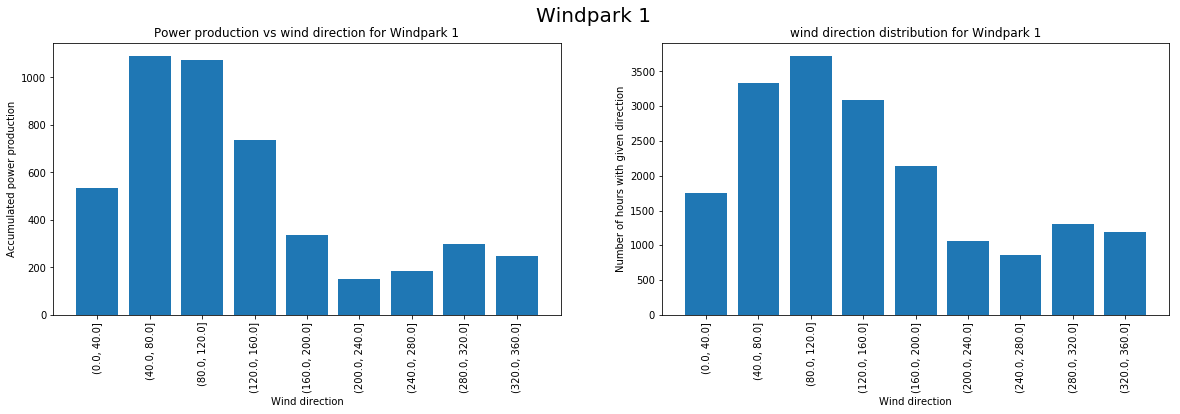

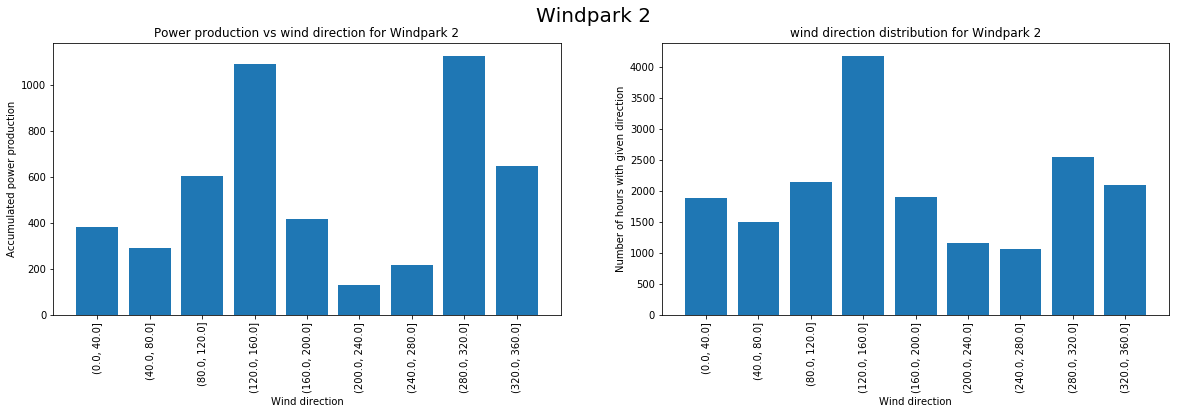

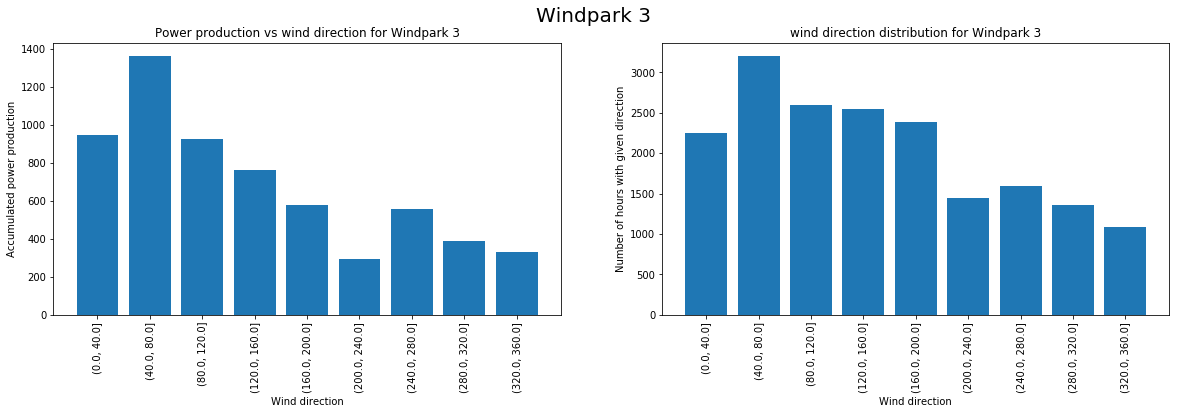

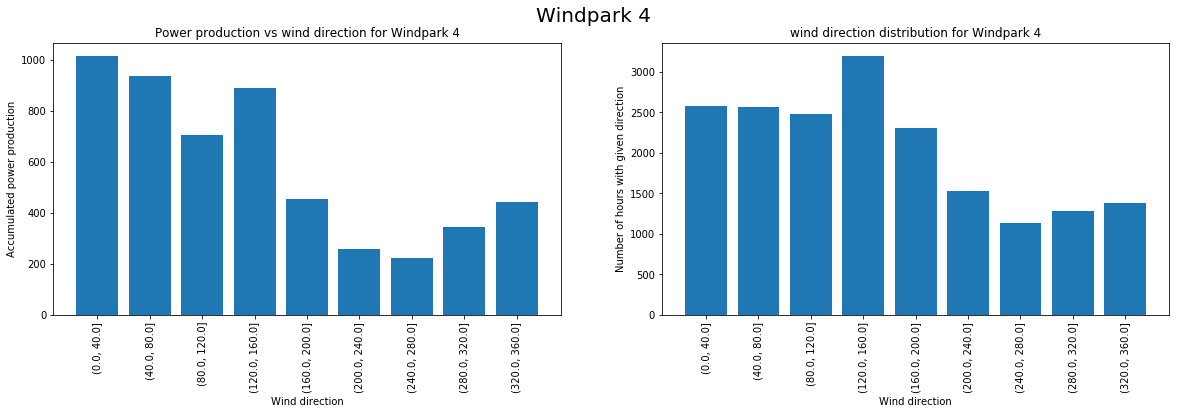

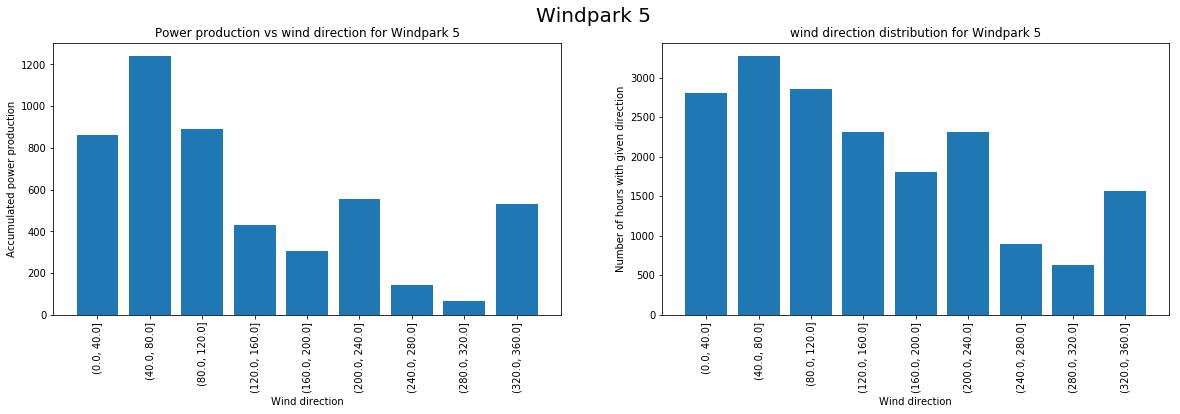

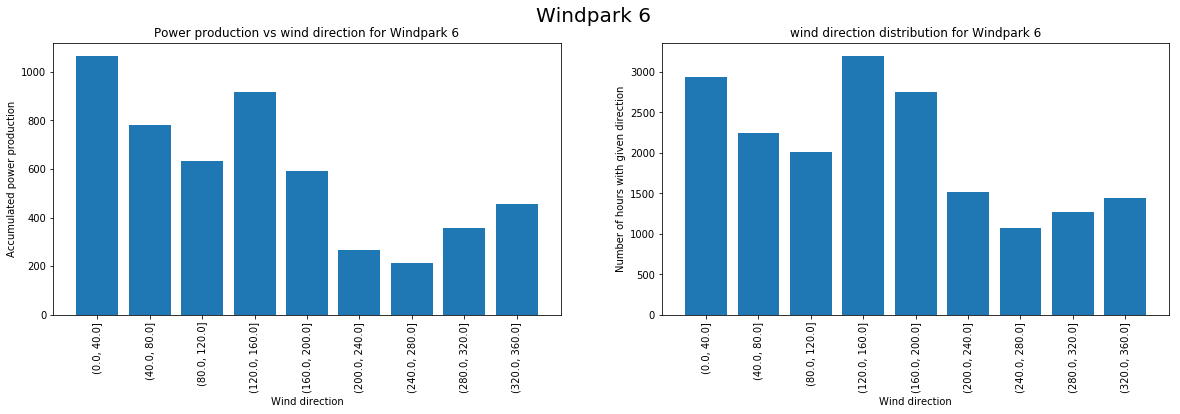

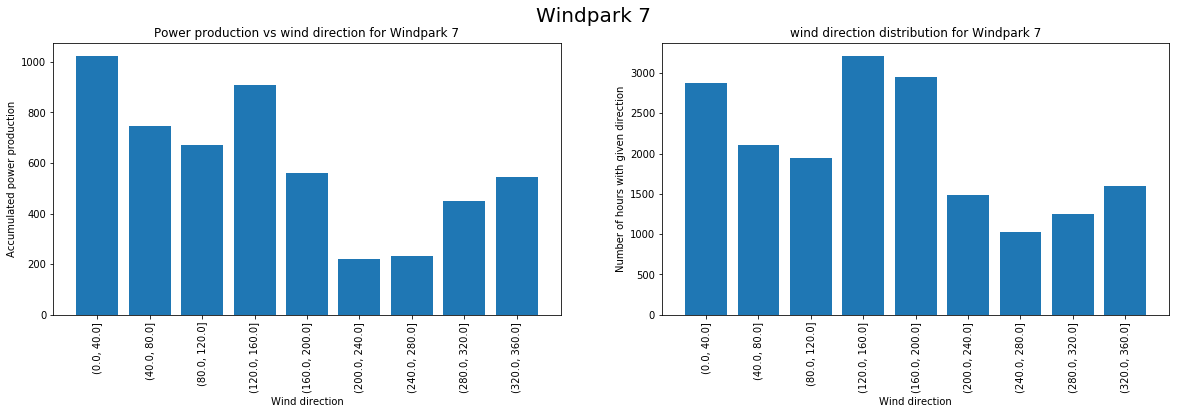

In [197]:
for i in range(len(datasets)):
    plot_wd(datasets[i], names[i], 'Plots/3')

## plot_wd_power_fine(datasets[1], names[1])

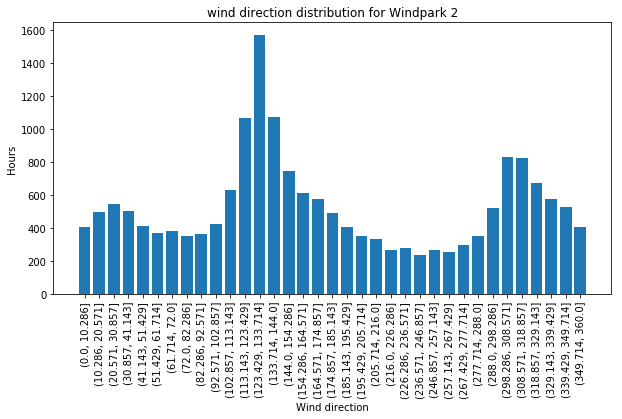

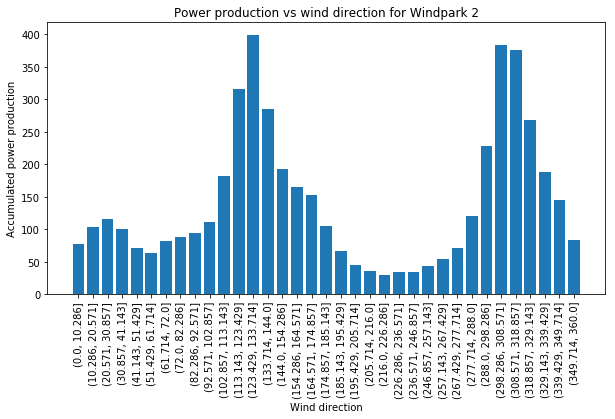

In [121]:
plot_wd_counts(datasets[1], names[1])
plot_wd_power(datasets[1], names[1])

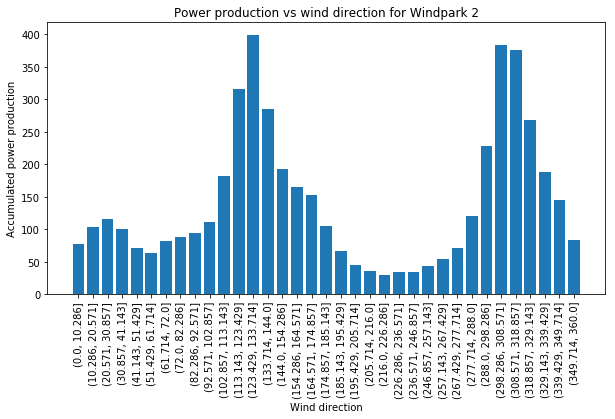

In [120]:
plot_wd_power(datasets[1], names[1])

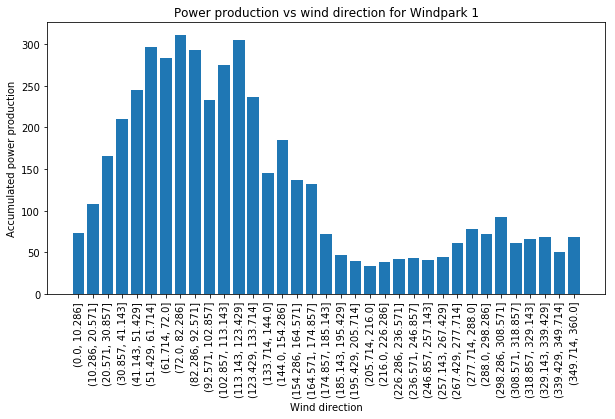

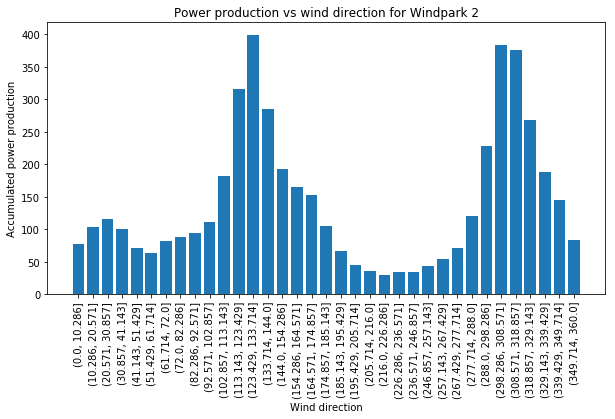

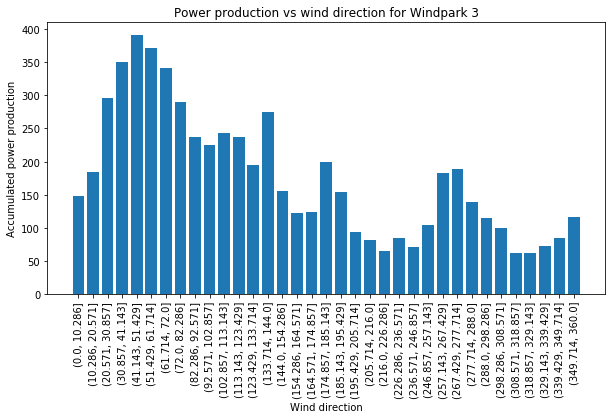

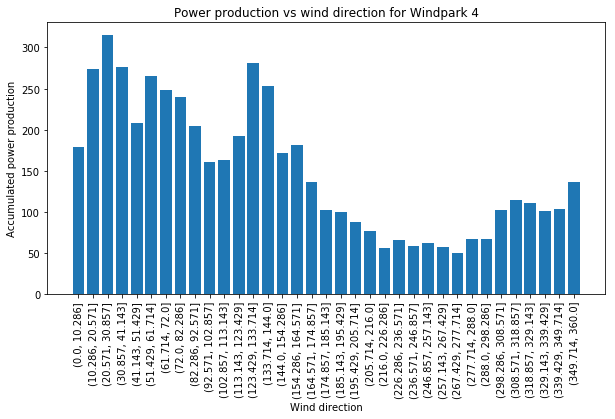

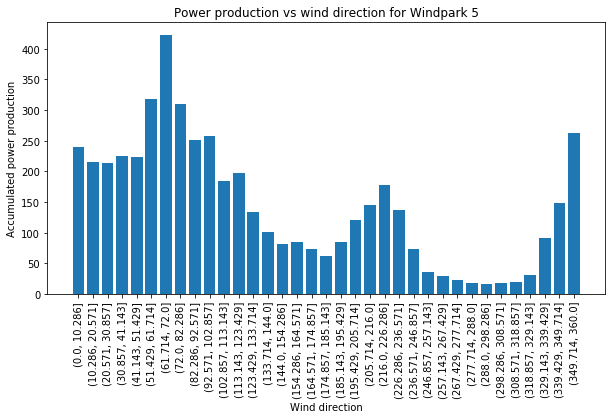

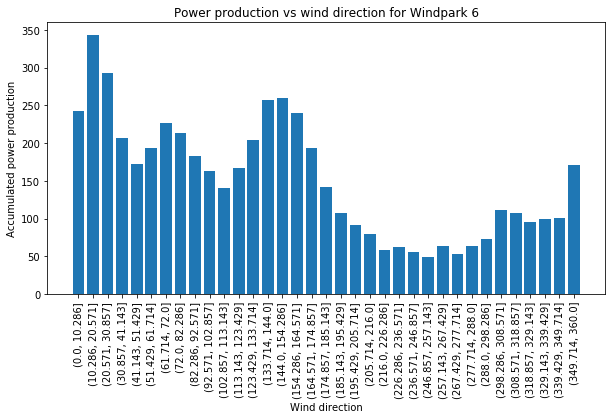

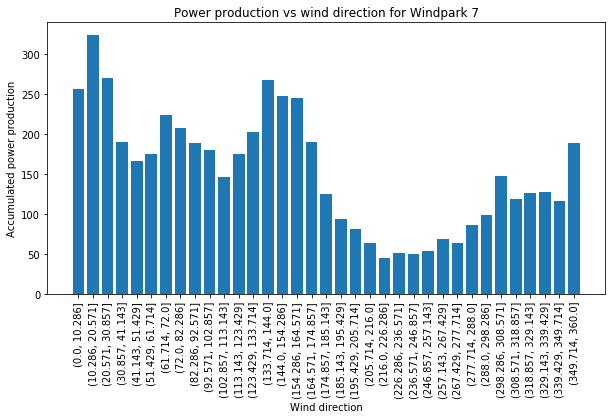

In [123]:
for i in range(len(datasets)):
    plot_wd_power(datasets[i], names[i])

## 3d Scatterplot

In [205]:
def scatter_3D(df, windpark_str, folderpath):
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

    filepath = f"{folderpath}windpark{windpark_str[-1]}.svg"
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(df['wd'], df['ws'], df['production'])
    ax.set_xlabel('Wind direction')
    ax.set_ylabel('Wind speed')
    ax.set_zlabel('Production')
    ax.set_title(windpark_str)
    
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.5)

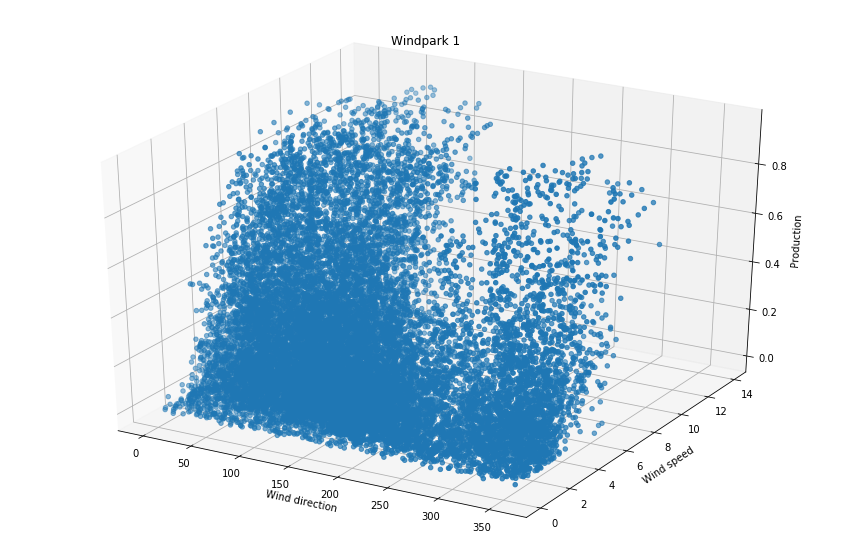

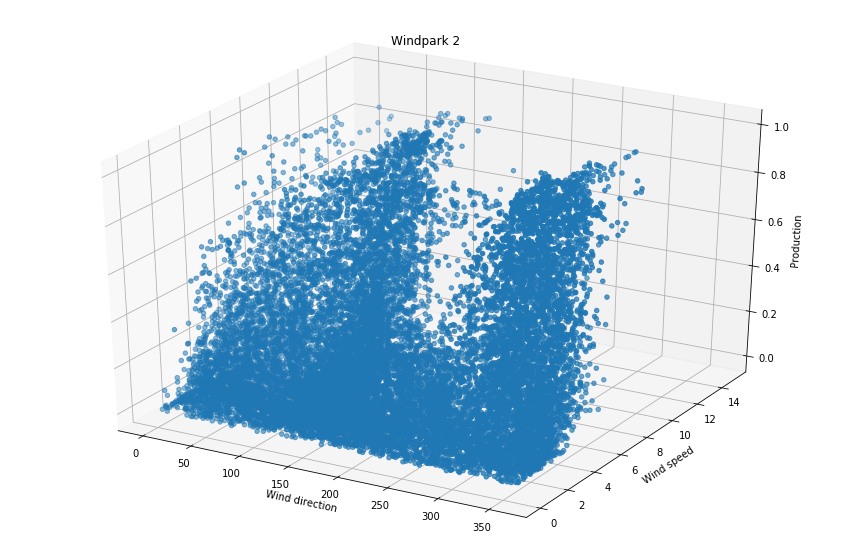

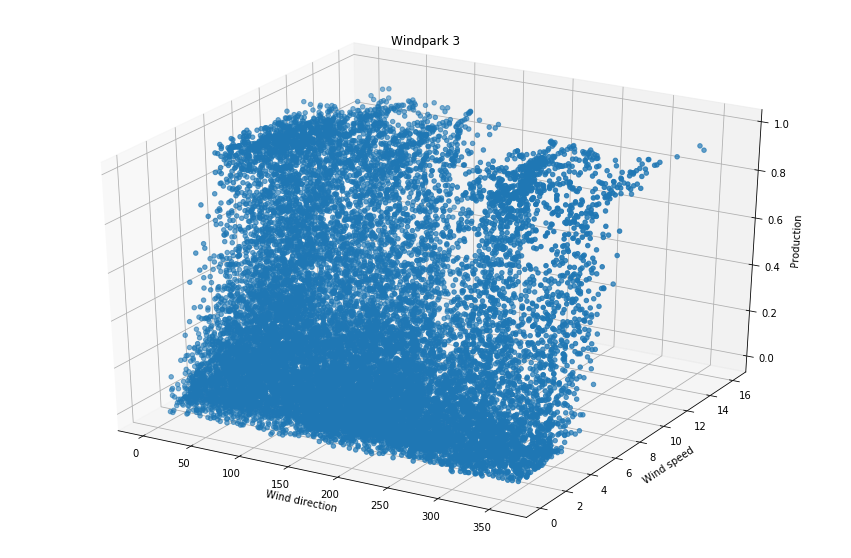

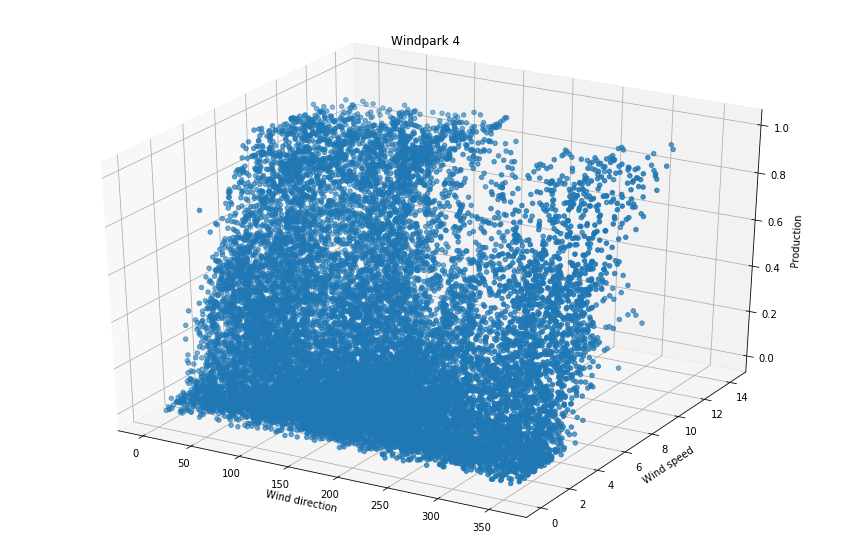

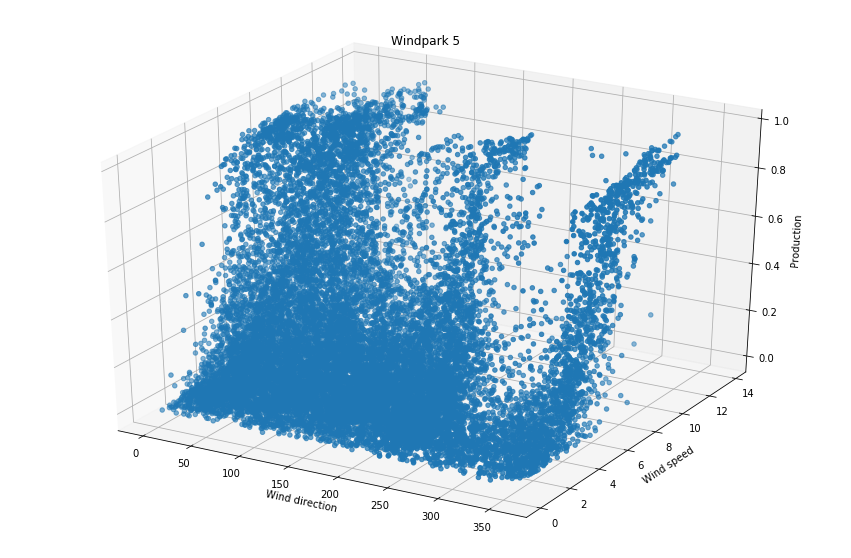

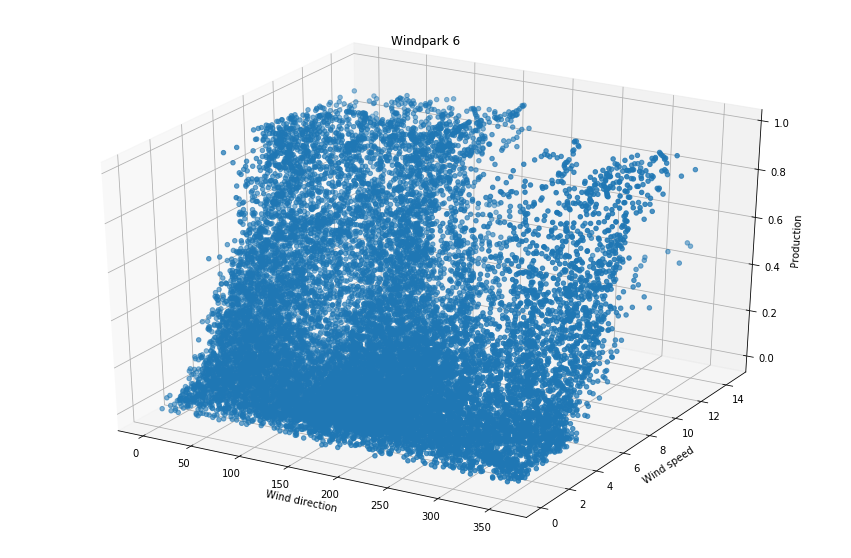

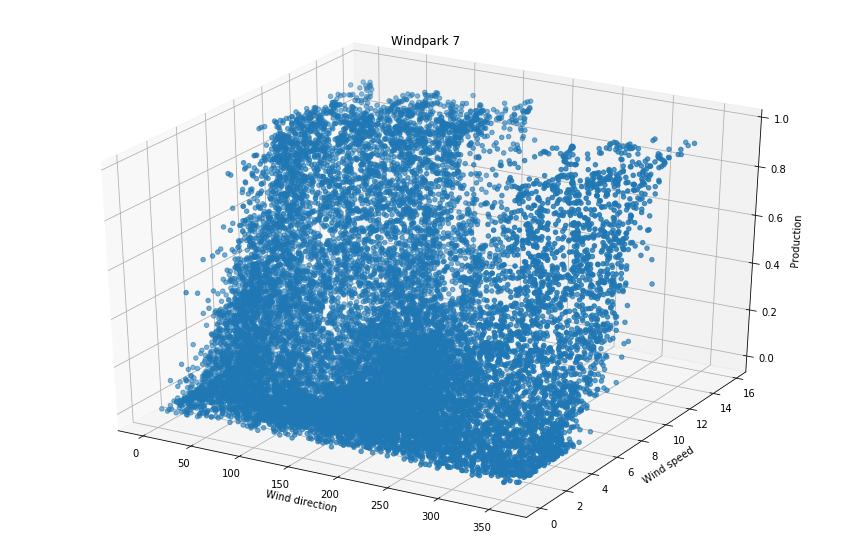

In [206]:
for i in range(len(names)):
    scatter_3D(datasets[i], names[i], 'Plots/3D-scatter/')

In [175]:
import statsmodels.api as sm

x = df['wd']
y = df['ws']
z = df['production']

model = sm.OLS(z,x)
fit = model.fit()
fit.params

wd    0.001105
dtype: float64

In [168]:
out = fit.predict(X)

In [169]:
out

0        0.131234
1        0.133610
2        0.132803
3        0.128006
4        0.117968
5        0.105453
6        0.097837
7        0.099705
8        0.105188
9        0.109124
10       0.114054
11       0.114264
12       0.111246
13       0.106592
14       0.102126
15       0.100302
16       0.104016
17       0.113623
18       0.126668
19       0.137778
20       0.149419
21       0.171617
22       0.163536
23       0.180594
24       0.193993
25       0.214610
26       0.247565
27       0.272627
28       0.256210
29       0.203964
           ...   
18414    0.179732
18415    0.191472
18416    0.198271
18417    0.196425
18418    0.190079
18419    0.185635
18420    0.189626
18421    0.190046
18422    0.189283
18423    0.187868
18424    0.186409
18425    0.185635
18426    0.186022
18427    0.186796
18428    0.186973
18429    0.185580
18430    0.182263
18431    0.176990
18432    0.160131
18433    0.147794
18434    0.141249
18435    0.141382
18436    0.145605
18437    0.149209
18438    0

In [172]:
df['wd'].tail()

18439    130.63
18440    128.25
18441    129.58
18442    134.64
18443    142.36
Name: wd, dtype: float64

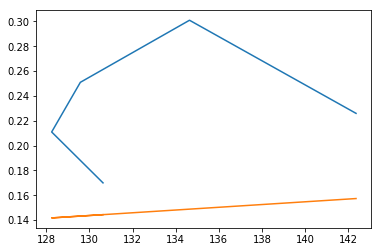

In [174]:
plt.plot(df['wd'].tail(), df['production'].tail())
plt.plot(df['wd'].tail(), out.tail())

In [184]:
polwd = np.poly1d(np.polyfit(x, z, 3))
polws = np.poly1d(np.polyfit(y, z, 3))

In [179]:
pol

poly1d([-3.87985328e-10,  3.00036194e-07, -7.32207046e-05,  5.46795583e-03,
        2.15211240e-01])

In [181]:
pol(x)

array([0.25735408, 0.25342903, 0.25476044, ..., 0.23772562, 0.22888826,
       0.21599655])

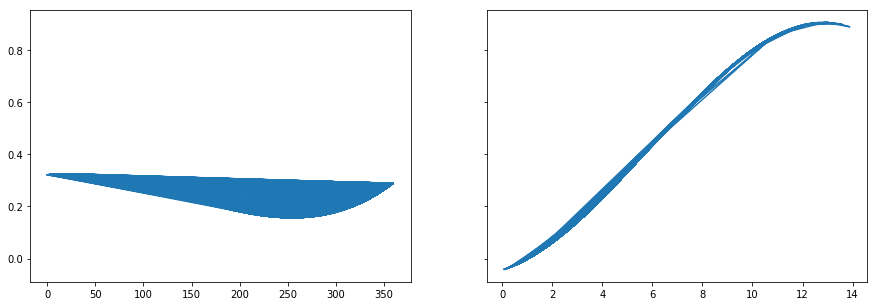

In [194]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(x, polwd(x))
ax2.plot(y, polws(y))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = [x,y]

poly = PolynomialFeatures(degree = 4)
(t, p) = poly.fit_transform(X, z)



In [91]:
test = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],'Max Speed' : [380., 370., 24., 26.]})
test


,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [94]:
test.groupby(['Animal']).sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0
